In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns
from sklearn.impute import SimpleImputer
from tensorflow import feature_column
from sklearn.model_selection import train_test_split
import pathlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetes = pd.read_csv("/content/drive/MyDrive/aiml project dataset/diabetes_binary_health_indicators.csv")
cancer = pd.read_csv("/content/drive/MyDrive/aiml project dataset/breastcancer.csv")
heart = pd.read_csv("/content/drive/MyDrive/aiml project dataset/heart_disease.csv")
kidney = pd.read_csv("/content/drive/MyDrive/aiml project dataset/kidney_disease.csv")
parkinson = pd.read_csv("/content/drive/MyDrive/aiml project dataset/parkinsons.csv")

# analysis

In [ ]:
def analysis(df):
  print("describtion", df.describe())
  print("\nNull Values:\n", df.isnull().sum())
  print("\nMissing Values:\n", df.isna().sum())
  print("variance:\n", df.var())
  sns.heatmap(df.corr())
  hist_mean=df.hist(bins=10, figsize=(15, 10),grid=False,)


### diabetes

describtion        Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.

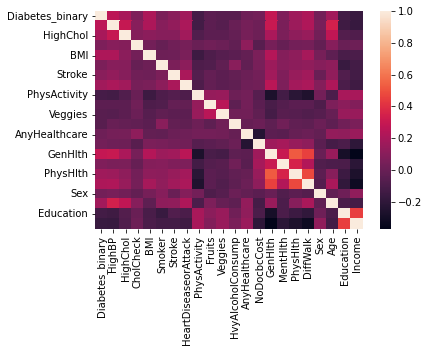

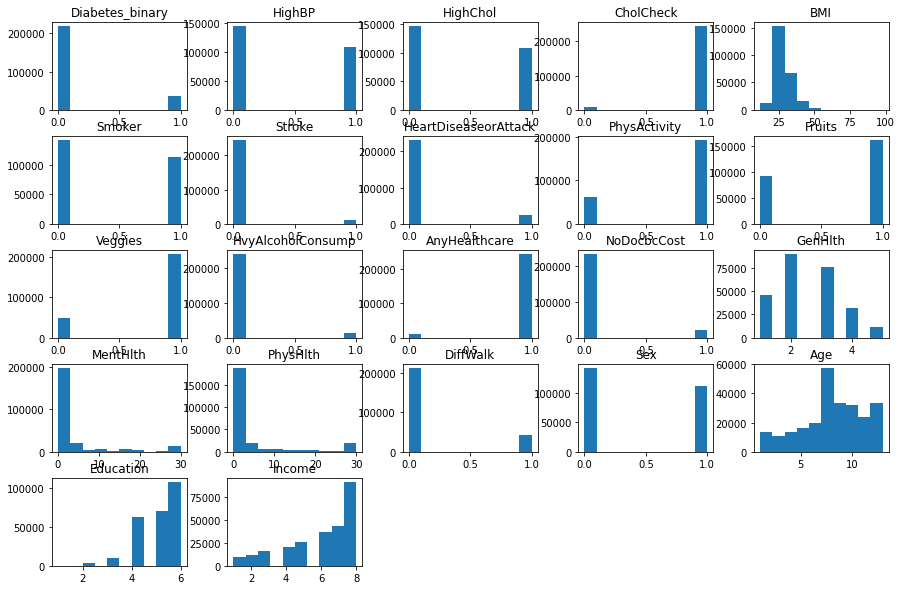

In [ ]:
analysis(diabetes)

In [ ]:
diabetes = diabetes.drop(['CholCheck','Stroke','AnyHealthcare'], axis = 1)
diabetes = diabetes.drop_duplicates(keep='first')

In [ ]:
y_di=diabetes["Diabetes_binary"]
X_di=diabetes.drop("Diabetes_binary", axis=1)

###breast cancer

describtion                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


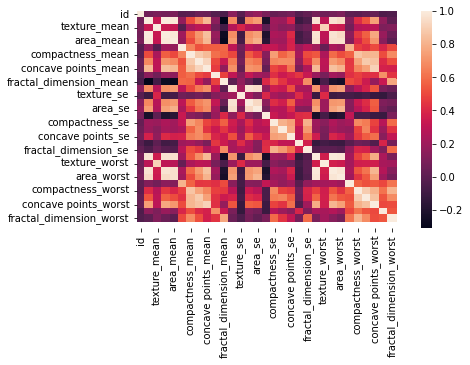

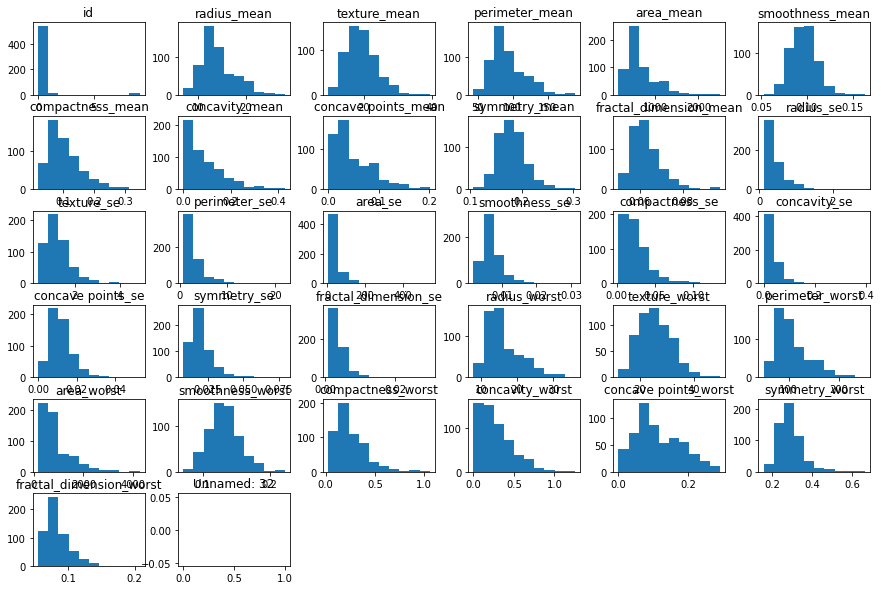

In [ ]:
analysis(cancer)

In [ ]:
cancer.drop('id', axis=1, inplace=True)
cancer.drop('Unnamed: 32', axis=1, inplace=True)
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})

In [ ]:
X_c= cancer.drop(['diagnosis'],axis=1)
y_c = cancer['diagnosis']

###heart disease

describtion        HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       

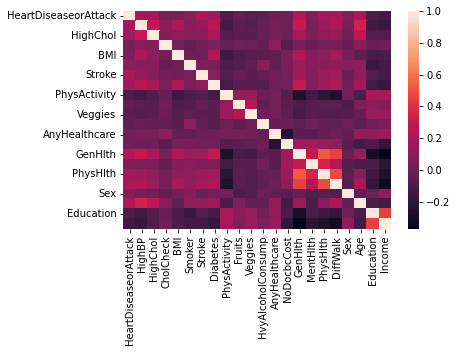

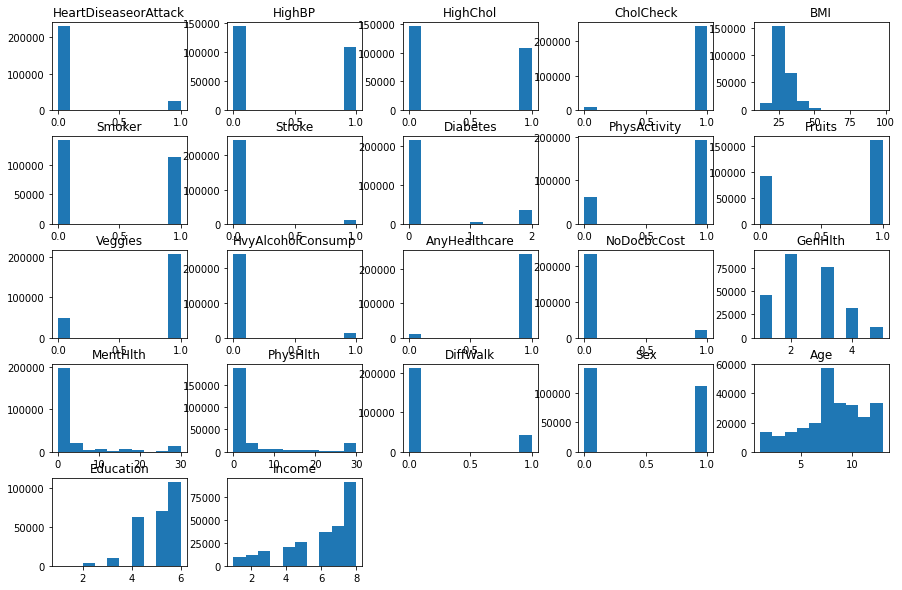

In [ ]:
analysis(heart)

In [ ]:
X_hr = heart.drop('HeartDiseaseorAttack',axis =1)
y_hr = heart['HeartDiseaseorAttack']

### kidney disease

describtion                id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


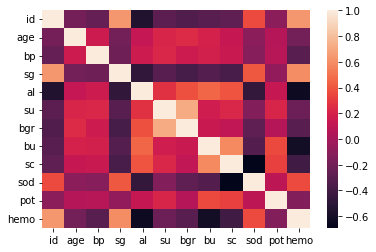

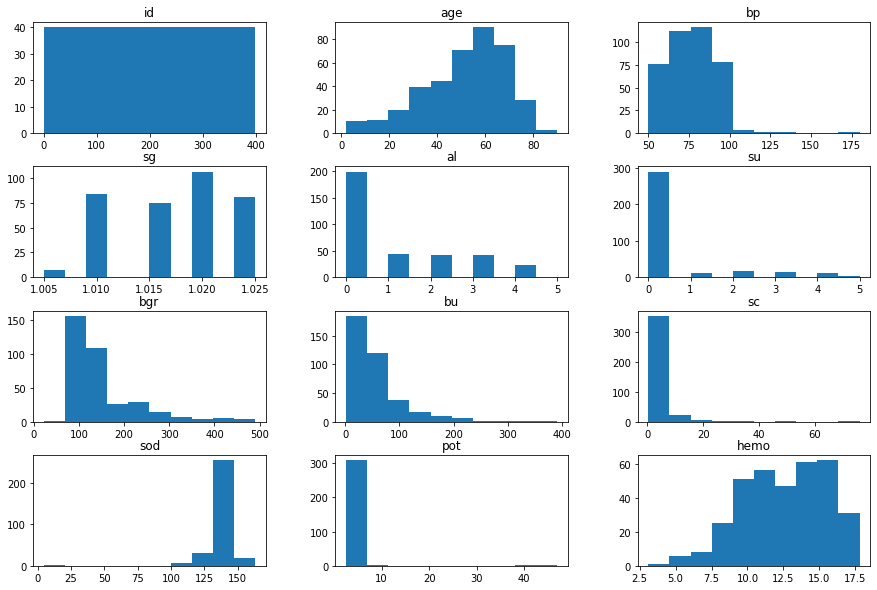

In [ ]:
analysis(kidney)

In [ ]:
kidney.drop('id', axis=1, inplace=True)
kidney.drop('bp',axis=1)
kidney.drop('rbc',axis=1)
kidney.drop('pot',axis=1)
kidney.drop('sod',axis=1)
kidney.drop('su',axis=1)
kidney.drop('al',axis=1)
kidney.drop('pcc',axis=1)
kidney.drop('pc',axis=1)
kidney.drop('rc',axis=1)
kidney.drop('htn',axis=1)
kidney.drop('dm',axis=1)
kidney.drop('cad',axis=1)
kidney.drop('appet',axis=1)
kidney.drop('pe',axis=1)
kidney.drop('ane',axis=1)
kidney.drop('ba',axis=1)
kidney = kidney.fillna(kidney.mean())
from sklearn.preprocessing import LabelEncoder
chronic_k = LabelEncoder()
kidney['classification']= chronic_k.fit_transform(kidney['classification'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
X_k = kidney.iloc[:,0:8]
y_k= kidney.iloc[:,8:9]

# pre processing

In [ ]:
def preprocess(df):
  #a = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  #df.loc[:,:] = a.fit_transform(df)
  ss=StandardScaler()
  df=ss.fit_transform(df)

In [ ]:
preprocess(X_c)
preprocess(X_hr)
# preprocess(X_k)
#X_train_k = ss.fit_transform(X_train_k)
#X_test_k = ss.transform(X_test_k)

In [ ]:
X_k

,age,bp,sg,al,su,rbc,pc,pcc
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent
...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent


In [ ]:
X_train_di, X_test_di,y_train_di, y_test_di=train_test_split(X_di,y_di,test_size=0.3)
X_train_c, X_test_c,y_train_c, y_test_c=train_test_split(X_c,y_c,test_size=0.3)
X_train_hr, X_test_hr,y_train_hr, y_test_hr=train_test_split(X_hr,y_hr,test_size=0.3)
X_train_k, X_test_k,y_train_k, y_test_k=train_test_split(X_k,y_k,test_size=0.3)

# models

In [ ]:
#performance
def perform(model,pred,X_train,X_test,y_train,y_test):
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model , X_test , y_test)
    plot_roc_curve(model , X_test , y_test)
    plot_precision_recall_curve(model , X_test , y_test)
    print("Score",model.score(X_test, pred)*100)

In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier
def rf(X_train,X_test,y_train,y_test):
  rf=RandomForestClassifier(n_estimators=20)
  rf.fit(X_train, y_train)
  pred_rf = rf.predict(X_test)
  print("for random forest:")
  perform(rf,pred_rf,X_train,X_test,y_train,y_test)

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train,X_test,y_train,y_test):
  knn=KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train,y_train)
  pred_knn = knn.predict(X_test)
  print("fKNN:")
  perform(knn,pred_knn,X_train,X_test,y_train,y_test)

In [ ]:
#GradientBoost
def gradientboost(X_train,X_test,y_train,y_test):
  gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
  pred_gb = gb.predict(X_test)
  print("GradientBoost:")
  perform(gb,pred_gb,X_train,X_test,y_train,y_test)

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
def adaboost(X_train,X_test,y_train,y_test):
  adb = AdaBoostClassifier(n_estimators=100, random_state=5)
  adb.fit(X_train, y_train)
  pred_adb = adb.predict(X_test)
  print("AdaBoost:")
  perform(adb,pred_adb,X_train,X_test,y_train,y_test)

In [ ]:
#Neural Network for Binary classfication

def NN3(X_train,X_test,y_train,y_test):
  tf.random.set_seed(42)
  nn = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')])
  nn.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001),metrics = ['accuracy'])
  history = nn.fit(X_train,y_train,epochs = 100)
  nn.evaluate(X_test,y_test)
  pred_nn = nn.predict(X_test)
  print("neuralnetwork:")
  perform(nn,pred_nn,X_train,X_test,y_train,y_test)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
def lgr(X_train,X_test,y_train,y_test):
  lgr= LogisticRegression()
  lgr.fit(X_train,y_train)
  pred_lgr = lgr.predict(X_test)
  print("logistic regressiont:")
  perform(lgr,pred_lgr,X_train,X_test,y_train,y_test)

In [ ]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
def dt(X_train,X_test,y_train,y_test):
  dt = DecisionTreeClassifier()
  dt.fit(X_train , y_train)
  pred_dt= dt.predict(X_test)
  print("DecisionTree Classifier:")
  perform(dt,pred_dt,X_train,X_test,y_train,y_test)

In [ ]:
#linear support vector classifier
from sklearn.svm import LinearSVC
def lsvc(X_train,X_test,y_train,y_test):
  lsvc = LinearSVC(verbose=0)
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
  lsvc.fit(X_train, y_train)
  pred_lsvc = lsvc.predict(X_test)
  print("linear support vector Classifier:")
  perform(lsvc,pred_lsvc,X_train,X_test,y_train,y_test)

#training

### diabetes

for random forest:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     57592
           1       0.44      0.17      0.24     10591

    accuracy                           0.84     68183
   macro avg       0.65      0.56      0.58     68183
weighted avg       0.80      0.84      0.81     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
fKNN:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     57592
           1       0.40      0.20      0.27     10591

    accuracy                           0.83     68183
   macro avg       0.63      0.57      0.59     68183
weighted avg       0.79      0.83      0.80     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
GradientBoost:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92     57592
           1       0.55      0.17      0.26     10591

    accuracy                           0.85     68183
   macro avg       0.71      0.57      0.59     68183
weighted avg       0.82      0.85      0.81     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
AdaBoost:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     57592
           1       0.55      0.18      0.27     10591

    accuracy                           0.85     68183
   macro avg       0.71      0.58      0.59     68183
weighted avg       0.82      0.85      0.82     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


logistic regressiont:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     57592
           1       0.52      0.15      0.24     10591

    accuracy                           0.85     68183
   macro avg       0.69      0.56      0.58     68183
weighted avg       0.81      0.85      0.81     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Score 100.0
DecisionTree Classifier:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     57592
           1       0.28      0.32      0.30     10591

    accuracy                           0.77     68183
   macro avg       0.58      0.59      0.58     68183
weighted avg       0.78      0.77      0.77     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


linear support vector Classifier:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     57592
           1       0.75      0.00      0.00     10591

    accuracy                           0.84     68183
   macro avg       0.80      0.50      0.46     68183
weighted avg       0.83      0.84      0.77     68183



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/precision_recall_curve.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`)

Score 100.0


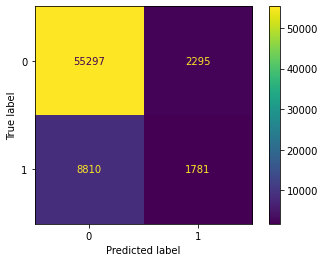

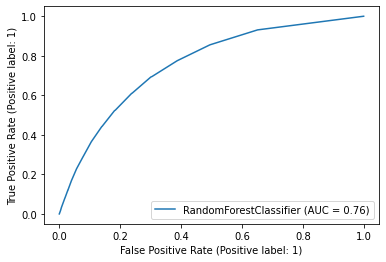

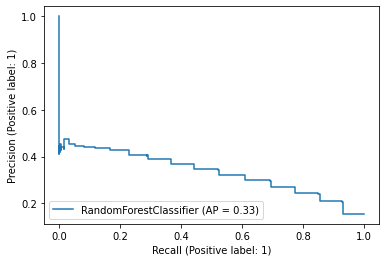

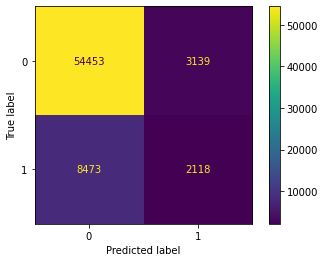

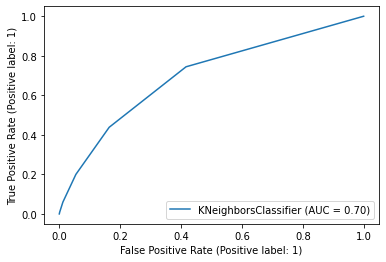

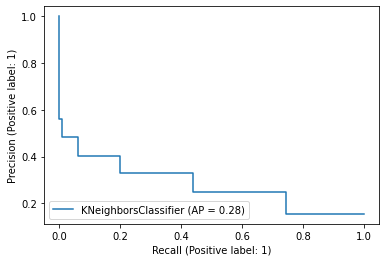

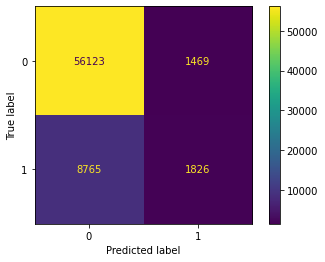

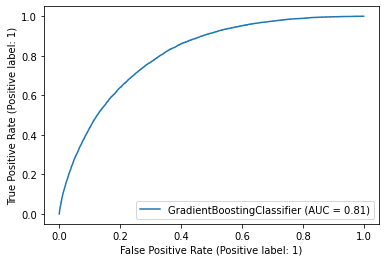

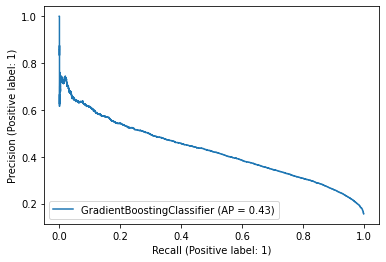

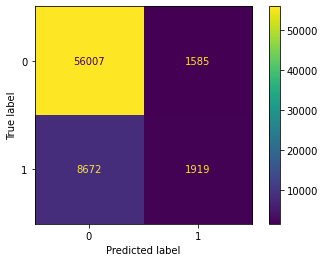

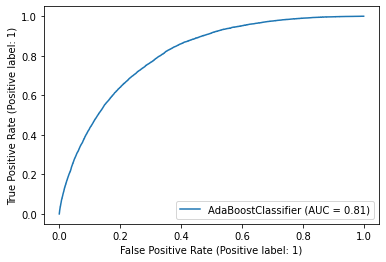

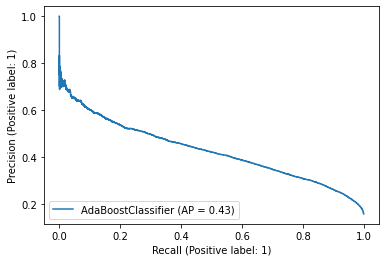

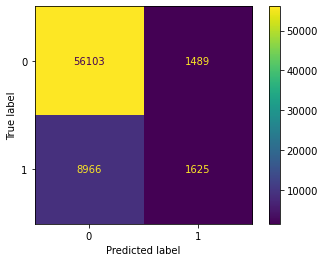

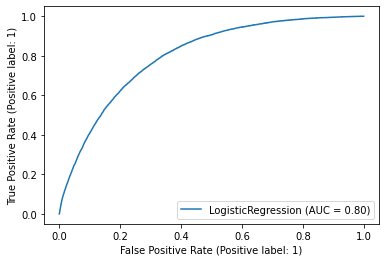

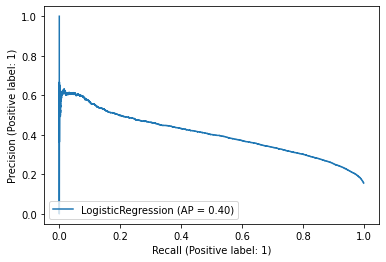

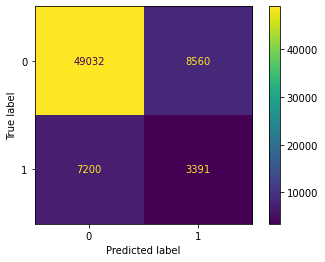

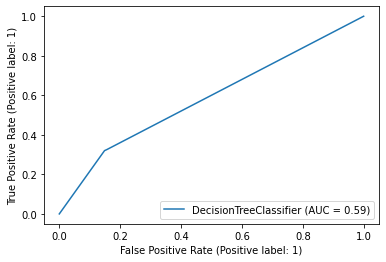

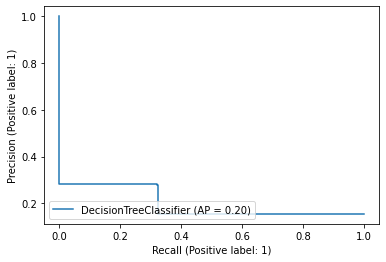

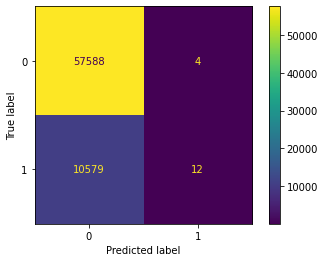

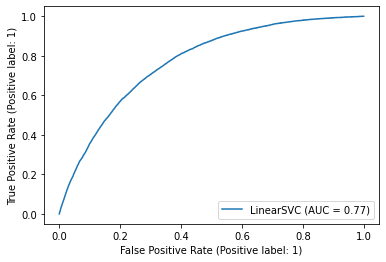

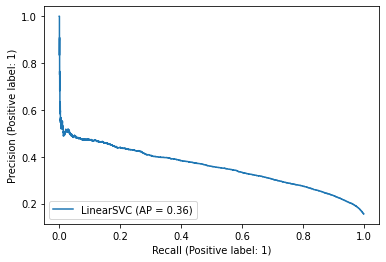

In [ ]:
rf(X_train_di, X_test_di,y_train_di, y_test_di)
knn(X_train_di, X_test_di,y_train_di, y_test_di)
gradientboost(X_train_di, X_test_di,y_train_di, y_test_di)
adaboost(X_train_di, X_test_di,y_train_di, y_test_di)
#NN3(X_train_di, X_test_di,y_train_di, y_test_di)
lgr(X_train_di, X_test_di,y_train_di, y_test_di)
dt(X_train_di, X_test_di,y_train_di, y_test_di)
lsvc(X_train_di, X_test_di,y_train_di, y_test_di)

### breast cancer

for random forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.95      0.97        61

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Score 100.0
fKNN:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       110
           1       0.89      0.95      0.92        61

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
GradientBoost:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       110
           1       0.95      0.93      0.94        61

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
AdaBoost:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       110
           1       0.95      0.97      0.96        61

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Score 100.0
logistic regressiont:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       110
           1       0.92      0.95      0.94        61

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
DecisionTree Classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.93      0.92      0.93        61

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Score 100.0
linear support vector Classifier:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.79      0.88        61

    accuracy                           0.92       171
   macro avg       0.95      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/precision_recall_curve.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`)

Score 100.0


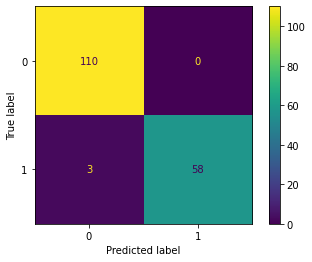

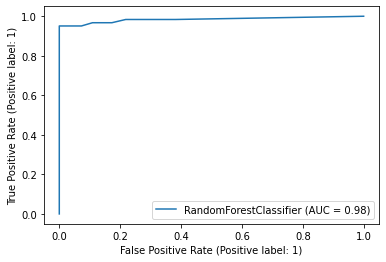

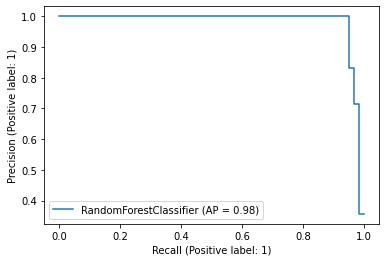

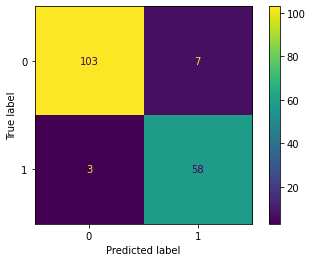

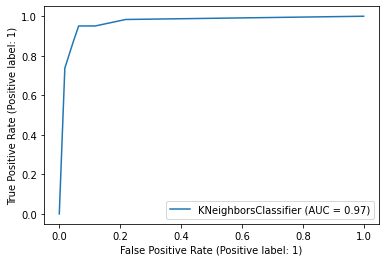

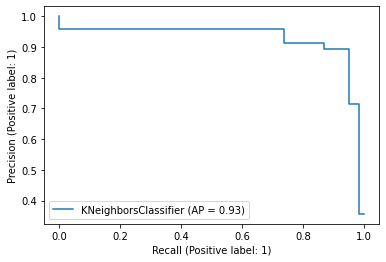

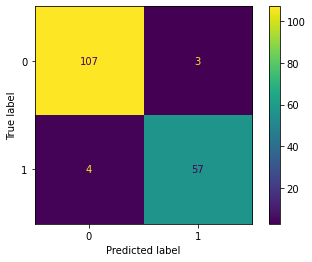

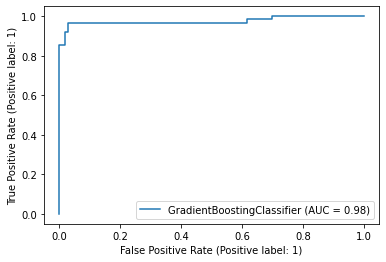

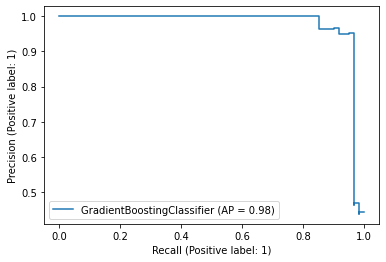

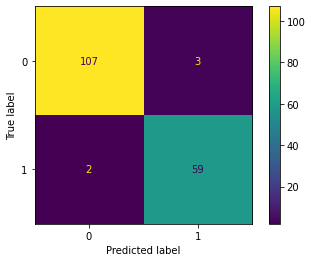

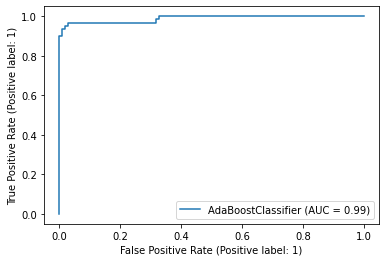

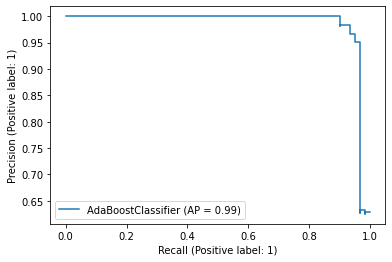

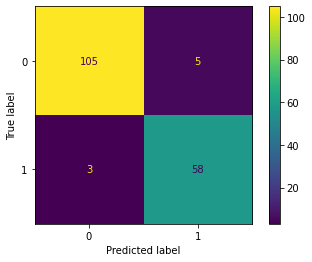

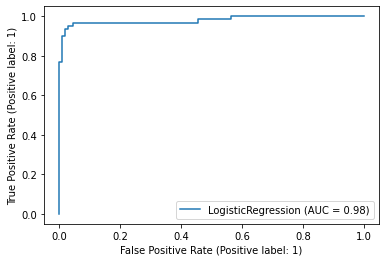

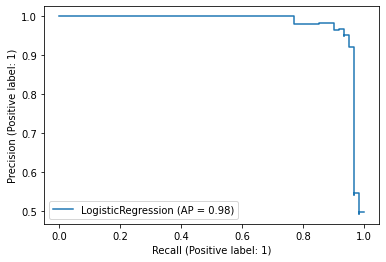

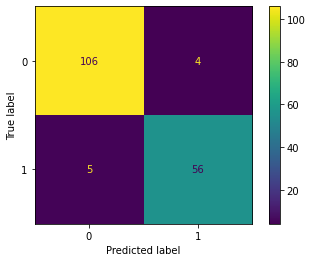

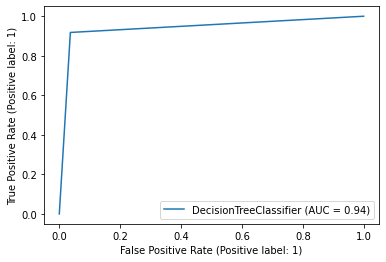

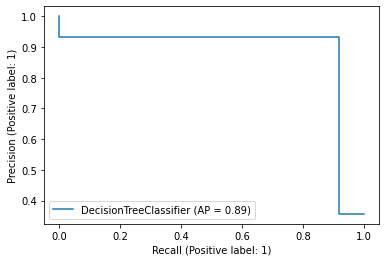

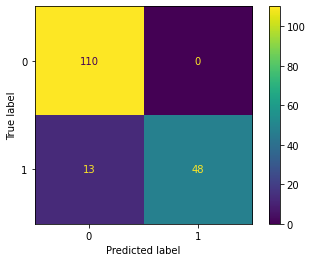

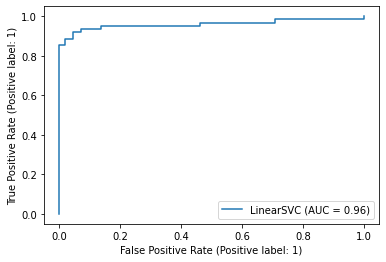

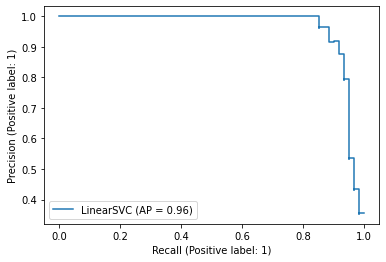

In [ ]:
rf(X_train_c, X_test_c,y_train_c, y_test_c)
knn(X_train_c, X_test_c,y_train_c, y_test_c)
gradientboost(X_train_c, X_test_c,y_train_c, y_test_c)
adaboost(X_train_c, X_test_c,y_train_c, y_test_c)
#NN3(X_train_c, X_test_c,y_train_c, y_test_c)
lgr(X_train_c, X_test_c,y_train_c, y_test_c)
dt(X_train_c, X_test_c,y_train_c, y_test_c)
lsvc(X_train_c, X_test_c,y_train_c, y_test_c)


### heart disease

for random forest:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     69082
         1.0       0.41      0.11      0.18      7022

    accuracy                           0.90     76104
   macro avg       0.66      0.55      0.56     76104
weighted avg       0.87      0.90      0.88     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
fKNN:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     69082
         1.0       0.33      0.11      0.16      7022

    accuracy                           0.90     76104
   macro avg       0.62      0.54      0.55     76104
weighted avg       0.86      0.90      0.87     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
GradientBoost:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69082
         1.0       0.54      0.13      0.22      7022

    accuracy                           0.91     76104
   macro avg       0.73      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
AdaBoost:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69082
         1.0       0.52      0.15      0.23      7022

    accuracy                           0.91     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.88      0.91      0.88     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


logistic regressiont:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69082
         1.0       0.51      0.14      0.21      7022

    accuracy                           0.91     76104
   macro avg       0.72      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0
DecisionTree Classifier:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     69082
         1.0       0.24      0.28      0.26      7022

    accuracy                           0.85     76104
   macro avg       0.58      0.59      0.59     76104
weighted avg       0.86      0.85      0.86     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


linear support vector Classifier:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     69082
         1.0       0.32      0.35      0.34      7022

    accuracy                           0.87     76104
   macro avg       0.63      0.64      0.63     76104
weighted avg       0.88      0.87      0.87     76104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Score 100.0


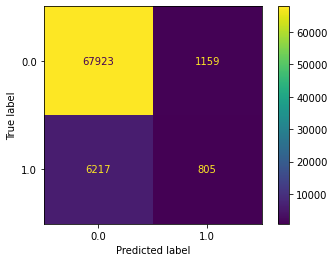

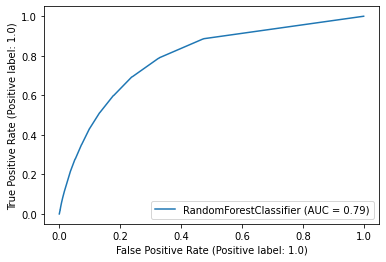

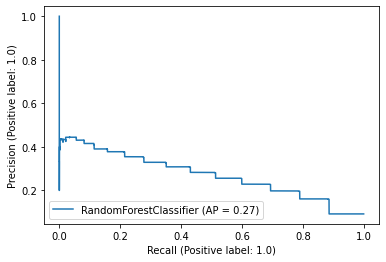

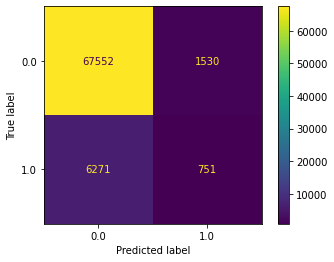

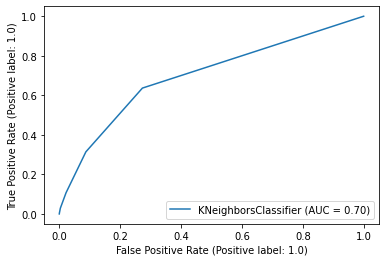

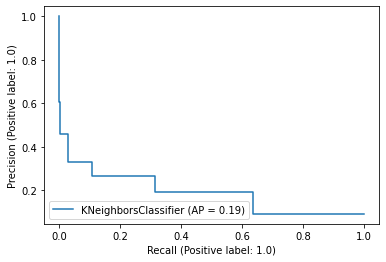

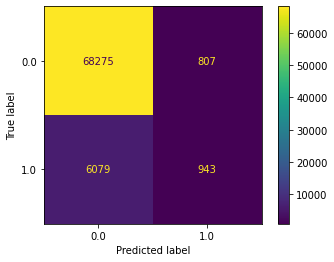

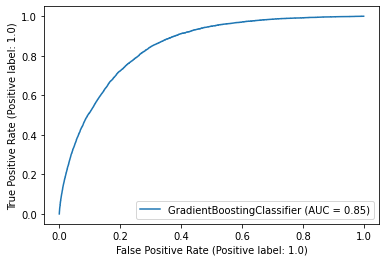

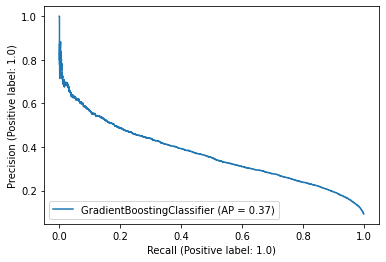

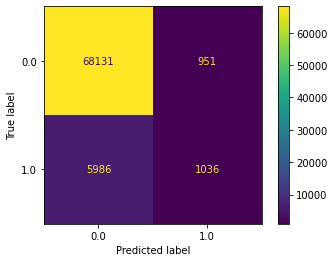

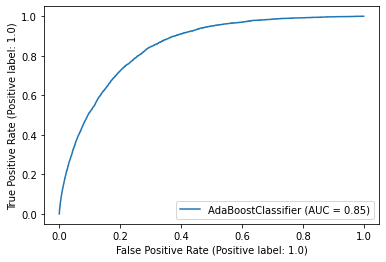

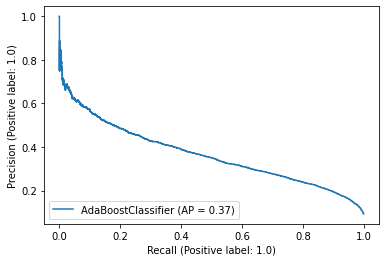

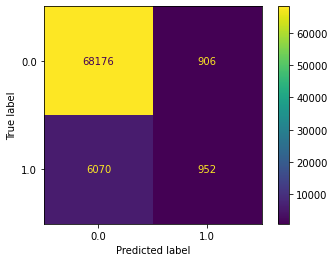

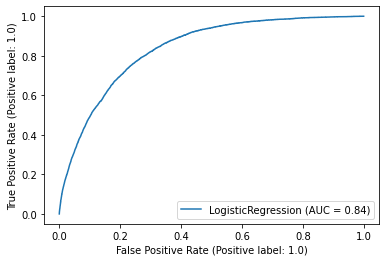

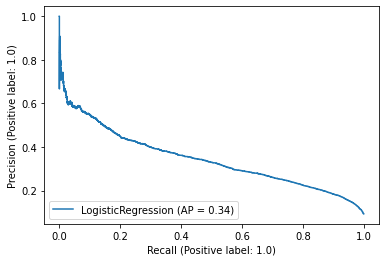

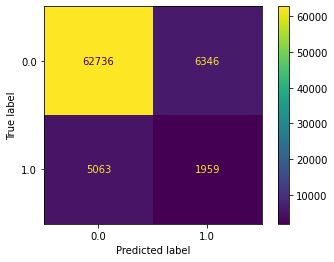

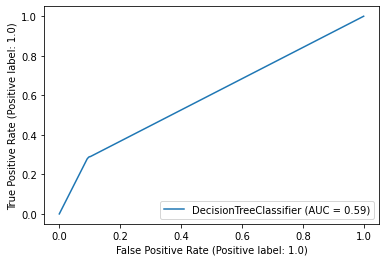

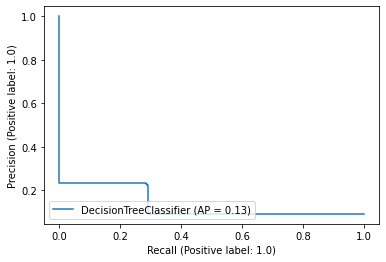

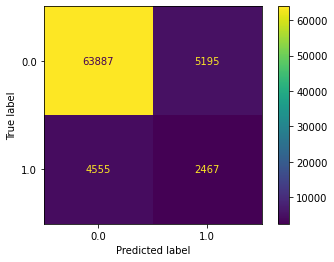

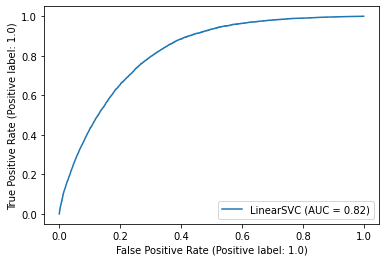

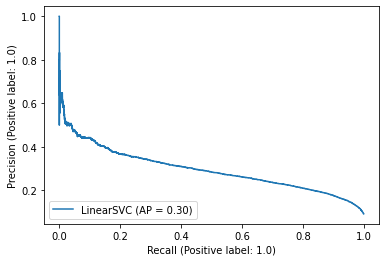

In [ ]:
rf(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
knn(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
gradientboost(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
adaboost(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
#NN3(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
lgr(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
dt(X_train_hr, X_test_hr,y_train_hr, y_test_hr)
lsvc(X_train_hr, X_test_hr,y_train_hr, y_test_hr)